# BRFSS 2021 Lifestyle EDA

Initial exploratory analysis of curated BRFSS features to guide feature engineering and modeling.



In [41]:
VALUE_LABELS = {
    "GENHLTH": {
        1.0: "Excellent",
        2.0: "Very good",
        3.0: "Good",
        4.0: "Fair",
        5.0: "Poor",
        7.0: "Don't know",
        9.0: "Refused",
    },
    "_SMOKER3": {
        1.0: "Every day smoker",
        2.0: "Some days smoker",
        3.0: "Former smoker",
        4.0: "Never smoked",
        9.0: "Missing",
    },
    "DRNKANY5": {
        1.0: "Yes",
        2.0: "No",
        7.0: "Don't know",
        9.0: "Refused",
    },
    "EXERANY2": {
        1.0: "Yes",
        2.0: "No",
        7.0: "Don't know",
        9.0: "Refused",
    },
    "_AGEG5YR": {
        1.0: "18-24",
        2.0: "25-29",
        3.0: "30-34",
        4.0: "35-39",
        5.0: "40-44",
        6.0: "45-49",
        7.0: "50-54",
        8.0: "55-59",
        9.0: "60-64",
        10.0: "65-69",
        11.0: "70-74",
        12.0: "75-79",
        13.0: "80+",
    },
    "_BMI5CAT": {
        1.0: "Underweight",
        2.0: "Normal",
        3.0: "Overweight",
        4.0: "Obese",
    },
}

sample = sample.assign(**{
    col: sample[col].map(mapping) if col in sample.columns else sample[col]
    for col, mapping in VALUE_LABELS.items()
})

sample.head()



,_STATE,FMONTH,SEQNO,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,EXERANY2,CVDINFR4,...,DRNK3GE5,MAXDRNKS,_AGEG5YR,_BMI5,_BMI5CAT,_RFBMI5,_SMOKER3,_RFSMOK3,DRNKANY5,_DRNKWK1
0,1.0,1.0,2021000001,2.0,NaN,20.0,10.0,88.0,NaN,2.0,...,NaN,NaN,NaN,1454.0,NaN,1.0,NaN,1.0,NaN,0.0
1,1.0,1.0,2021000002,2.0,NaN,88.0,88.0,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,9.0,NaN,1.0,NaN,0.0
2,1.0,1.0,2021000003,2.0,NaN,88.0,88.0,NaN,NaN,2.0,...,NaN,NaN,NaN,2829.0,NaN,2.0,NaN,1.0,NaN,0.0
3,1.0,1.0,2021000004,2.0,NaN,88.0,10.0,88.0,NaN,2.0,...,1.0,6.0,NaN,3347.0,NaN,2.0,NaN,1.0,NaN,300.0
4,1.0,1.0,2021000005,1.0,NaN,30.0,88.0,30.0,NaN,1.0,...,NaN,NaN,NaN,2873.0,NaN,2.0,NaN,1.0,NaN,0.0


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

full_df = pd.concat(pd.read_parquet(part) for part in parquet_parts)
full_df = full_df.assign(**{
    col: full_df[col].map(mapping) if col in full_df.columns else full_df[col]
    for col, mapping in VALUE_LABELS.items()
})

summary = full_df.isna().sum().sort_values(ascending=False)
print("Missing values per column:\n", summary)



Missing values per column:
 SMOKDAY2    271240
MAXDRNKS    229430
DRNK3GE5    228868
AVEDRNK3    228271
POORHLTH    205279
_BMI5CAT     46852
_BMI5        46852
ECIGNOW1     23025
SMOKE100     21232
HEIGHT3      12959
WEIGHT2      11816
_AGEG5YR      9607
INCOME3       8847
GENHLTH          4
DIABETE4         3
PHYSHLTH         3
CHCKDNY2         3
CVDSTRK3         2
ASTHMA3          2
CVDCRHD4         2
CVDINFR4         2
EXERANY2         2
MENTHLTH         2
_RFBMI5          0
_SMOKER3         0
_RFSMOK3         0
DRNKANY5         0
_STATE           0
FMONTH           0
SEXVAR           0
SEQNO            0
_DRNKWK1         0
dtype: int64


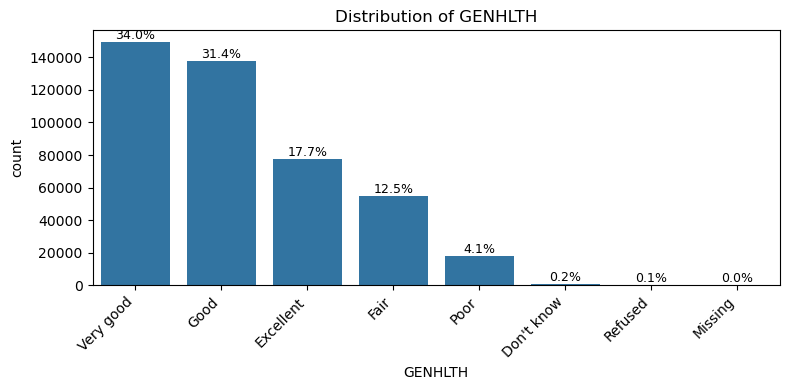

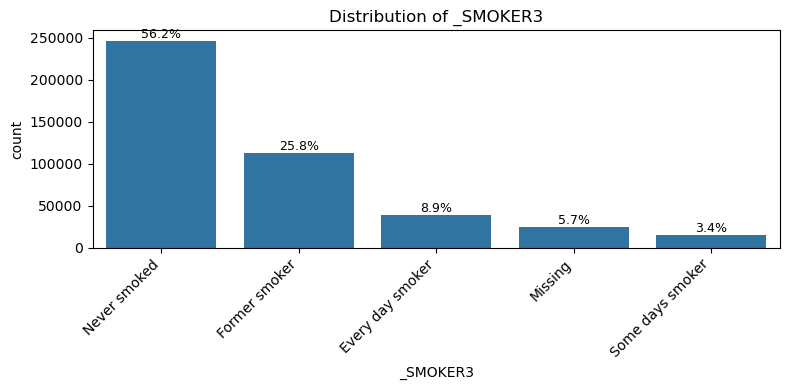

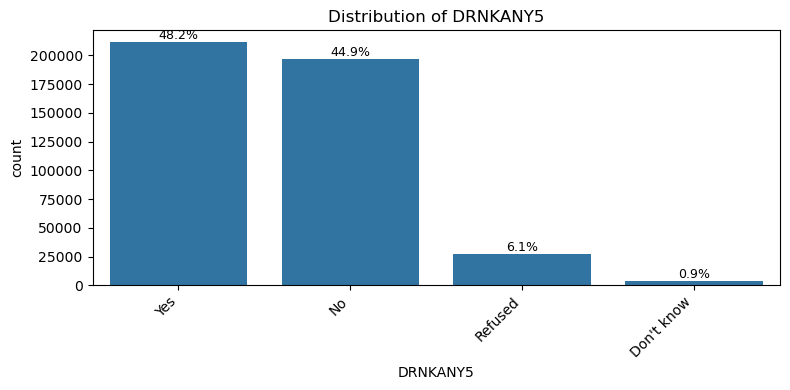

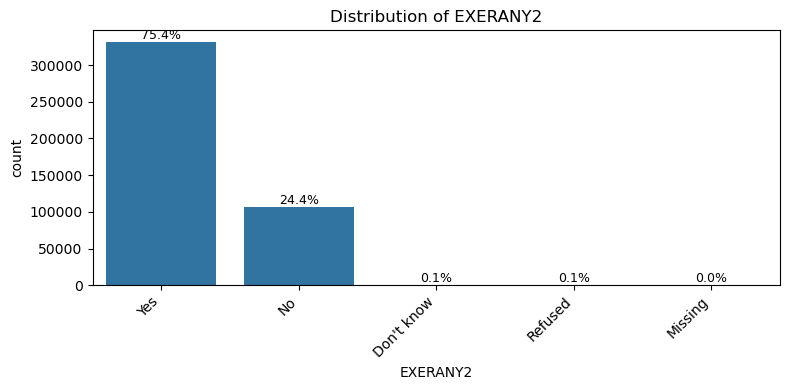

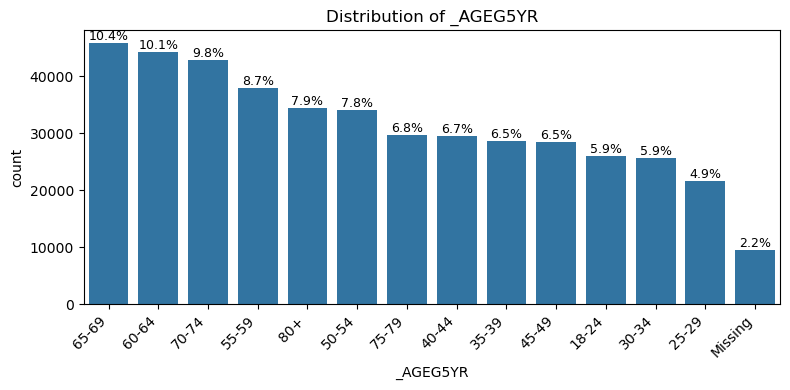

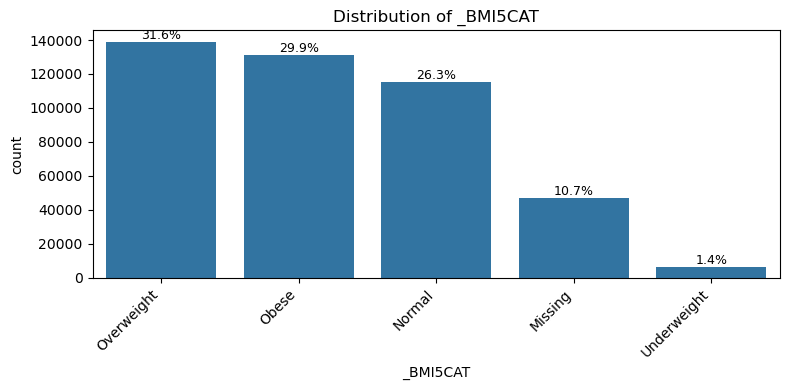

In [43]:
categorical_cols = [
    "GENHLTH",
    "_SMOKER3",
    "DRNKANY5",
    "EXERANY2",
    "_AGEG5YR",
    "_BMI5CAT",
]

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    series = full_df[col].fillna("Missing").astype(str)
    order = series.value_counts().index.tolist()
    sns.countplot(x=series, order=order)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.xticks(rotation=45, ha="right")
    total = len(series)
    bar_labels = [f"{count / total:.1%}" for count in series.value_counts().loc[order]]
    for patch, label in zip(plt.gca().patches, bar_labels):
        plt.gca().text(
            patch.get_x() + patch.get_width() / 2,
            patch.get_height(),
            label,
            ha="center",
            va="bottom",
            fontsize=9,
        )
    plt.tight_layout()
    plt.show()



In [44]:
numeric_cols = ["_BMI5", "AVEDRNK3", "MAXDRNKS", "WEIGHT2", "HEIGHT3"]
full_df[numeric_cols].describe(percentiles=[0.25, 0.5, 0.75])


,_BMI5,AVEDRNK3,MAXDRNKS,WEIGHT2,HEIGHT3
count,391841.000000,210422.000000,209263.000000,426877.000000,425734.000000
mean,2855.226495,4.207868,6.056952,828.573662,809.564843
std,655.194977,12.773159,14.864445,2356.006810,1569.331276
min,1200.000000,1.000000,1.000000,50.000000,300.000000
25%,2414.000000,1.000000,1.000000,150.000000,504.000000
50%,2744.000000,2.000000,2.000000,180.000000,507.000000
75%,3174.000000,3.000000,4.000000,220.000000,511.000000
max,9933.000000,99.000000,99.000000,9999.000000,9999.000000


In [45]:
chronic_cols = ["CVDINFR4", "CVDCRHD4", "CVDSTRK3", "DIABETE4", "ASTHMA3", "CHCKDNY2"]

for outcome in chronic_cols:
    ctab = pd.crosstab(full_df["_SMOKER3"], full_df[outcome], normalize="index")
    print(f"\nSmoking status vs {outcome}")
    display(ctab)




Smoking status vs CVDINFR4


CVDINFR4,1.0,2.0,7.0,9.0
_SMOKER3,,,,
Every day smoker,0.079279,0.913679,0.006759,0.000283
Former smoker,0.080302,0.914082,0.005307,0.000309
Missing,0.045618,0.940284,0.007610,0.006488
Never smoked,0.034402,0.960421,0.004683,0.000495
Some days smoker,0.068905,0.923453,0.007373,0.000268



Smoking status vs CVDCRHD4


CVDCRHD4,1.0,2.0,7.0,9.0
_SMOKER3,,,,
Every day smoker,0.059337,0.928636,0.011744,0.000283
Former smoker,0.084188,0.903309,0.012150,0.000353
Missing,0.041693,0.942126,0.009652,0.006528
Never smoked,0.037406,0.955239,0.006868,0.000487
Some days smoker,0.052349,0.936189,0.011127,0.000335



Smoking status vs CVDSTRK3


CVDSTRK3,1.0,2.0,7.0,9.0
_SMOKER3,,,,
Every day smoker,0.059492,0.935985,0.004266,0.000257
Former smoker,0.051516,0.945305,0.002949,0.000230
Missing,0.035165,0.955783,0.003004,0.006048
Never smoked,0.030019,0.967556,0.001987,0.000438
Some days smoker,0.052416,0.943093,0.004357,0.000134



Smoking status vs DIABETE4


DIABETE4,1.0,2.0,3.0,4.0,7.0,9.0
_SMOKER3,,,,,,
Every day smoker,0.134428,0.010022,0.829389,0.024234,0.001747,0.000180
Former smoker,0.168075,0.007126,0.797460,0.025731,0.001254,0.000353
Missing,0.115593,0.007570,0.848760,0.018985,0.002043,0.007049
Never smoked,0.116419,0.009236,0.851219,0.021270,0.001281,0.000576
Some days smoker,0.117367,0.009652,0.845834,0.024465,0.002413,0.000268



Smoking status vs ASTHMA3


ASTHMA3,1.0,2.0,7.0,9.0
_SMOKER3,,,,
Every day smoker,0.173438,0.822013,0.004240,0.000308
Former smoker,0.143695,0.852711,0.003276,0.000318
Missing,0.122597,0.866789,0.004526,0.006088
Never smoked,0.133618,0.863037,0.002939,0.000405
Some days smoker,0.165091,0.830217,0.004491,0.000201



Smoking status vs CHCKDNY2


CHCKDNY2,1.0,2.0,7.0,9.0
_SMOKER3,,,,
Every day smoker,0.037134,0.958806,0.003778,0.000283
Former smoker,0.053291,0.942692,0.003771,0.000247
Missing,0.031682,0.957704,0.004165,0.006449
Never smoked,0.033709,0.962768,0.003037,0.000487
Some days smoker,0.034587,0.961190,0.004089,0.000134


In [46]:
for outcome in chronic_cols:
    ctab = pd.crosstab(full_df["DRNKANY5"], full_df[outcome], normalize="index")
    print(f"\nAlcohol use vs {outcome}")
    display(ctab)




Alcohol use vs CVDINFR4


CVDINFR4,1.0,2.0,7.0,9.0
DRNKANY5,,,,
Don't know,0.052970,0.932049,0.013911,0.001070
No,0.068430,0.923895,0.007137,0.000538
Refused,0.044285,0.942866,0.006481,0.006369
Yes,0.037740,0.958752,0.003257,0.000251



Alcohol use vs CVDCRHD4


CVDCRHD4,1.0,2.0,7.0,9.0
DRNKANY5,,,,
Don't know,0.040931,0.939807,0.018192,0.001070
No,0.067105,0.920009,0.012323,0.000564
Refused,0.041156,0.944095,0.008566,0.006183
Yes,0.039871,0.954126,0.005728,0.000275



Alcohol use vs CVDSTRK3


CVDSTRK3,1.0,2.0,7.0,9.0
DRNKANY5,,,,
Don't know,0.041199,0.951043,0.006956,0.000803
No,0.053664,0.942491,0.003342,0.000503
Refused,0.033335,0.958173,0.002719,0.005773
Yes,0.026506,0.971538,0.001766,0.000189



Alcohol use vs DIABETE4


DIABETE4,1.0,2.0,3.0,4.0,7.0,9.0
DRNKANY5,,,,,,
Don't know,0.101926,0.005350,0.864098,0.023274,0.003745,0.001605
No,0.182352,0.009387,0.779166,0.026728,0.001676,0.000691
Refused,0.111517,0.007077,0.855706,0.017320,0.001788,0.006593
Yes,0.086829,0.008285,0.884061,0.019542,0.001046,0.000237



Alcohol use vs ASTHMA3


ASTHMA3,1.0,2.0,7.0,9.0
DRNKANY5,,,,
Don't know,0.127876,0.864633,0.006153,0.001338
No,0.150804,0.845021,0.003708,0.000467
Refused,0.122090,0.868710,0.003576,0.005624
Yes,0.132826,0.864111,0.002803,0.000260



Alcohol use vs CHCKDNY2


CHCKDNY2,1.0,2.0,7.0,9.0
DRNKANY5,,,,
Don't know,0.031033,0.960139,0.007491,0.001338
No,0.054685,0.940296,0.004480,0.000538
Refused,0.030095,0.959923,0.003874,0.006108
Yes,0.025616,0.971917,0.002244,0.000223


In [47]:
behavior_cols = ["_SMOKER3", "DRNKANY5", "EXERANY2", "_BMI5CAT"]
encoded_df = full_df[behavior_cols + chronic_cols].dropna()
if encoded_df.empty:
    print("No rows available after dropping NA values for correlation heatmap.")
else:
    dummies = pd.get_dummies(encoded_df)
    behavior_cols_expanded = [
        col for col in dummies.columns if any(col.startswith(f"{bcol}_") for bcol in behavior_cols)
    ]
    chronic_cols_expanded = [
        col for col in dummies.columns if any(col.startswith(f"{ccol}_") for ccol in chronic_cols)
    ]

    if not behavior_cols_expanded or not chronic_cols_expanded:
        print("Insufficient dummy columns to compute correlation heatmap.")
    else:
        corr_matrix = dummies.corr().loc[chronic_cols_expanded, behavior_cols_expanded]
        if corr_matrix.empty:
            print("Correlation matrix is empty; skipping heatmap.")
        else:
            plt.figure(figsize=(12, 6))
            sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
            plt.title("Behavior vs chronic condition correlations (one-hot)")
            plt.tight_layout()
            plt.show()



Insufficient dummy columns to compute correlation heatmap.


In [48]:
chronic_indicators = {
    "cardio": ["CVDINFR4", "CVDCRHD4", "CVDSTRK3"],
    "metabolic": ["DIABETE4"],
    "respiratory": ["ASTHMA3"],
    "renal": ["CHCKDNY2"],
}

risk_df = full_df.copy()
for group, cols in chronic_indicators.items():
    risk_df[group.upper() + "_FLAG"] = risk_df[cols].eq(1.0).any(axis=1)

flag_cols = [col for col in risk_df.columns if col.endswith("_FLAG")]
risk_df["HIGH_RISK"] = risk_df[flag_cols].any(axis=1)

risk_df[flag_cols + ["HIGH_RISK"]].head()



,CARDIO_FLAG,METABOLIC_FLAG,RESPIRATORY_FLAG,RENAL_FLAG,HIGH_RISK
0,False,False,True,False,True
1,True,True,False,True,True
2,True,True,False,False,True
3,False,True,False,False,True
4,True,True,False,False,True


In [49]:
risk_distribution = risk_df["HIGH_RISK"].value_counts(normalize=True).rename({True: "High risk", False: "Lower risk"}) * 100
print("High-risk prevalence (%):")
print(risk_distribution)



High-risk prevalence (%):
HIGH_RISK
Lower risk    67.827387
High risk     32.172613
Name: proportion, dtype: float64


In [50]:
feature_cols = [
    "_STATE",
    "FMONTH",
    "SEXVAR",
    "_AGEG5YR",
    "GENHLTH",
    "PHYSHLTH",
    "MENTHLTH",
    "POORHLTH",
    "EXERANY2",
    "SMOKE100",
    "SMOKDAY2",
    "_SMOKER3",
    "_RFSMOK3",
    "ECIGNOW1",
    "DRNKANY5",
    "AVEDRNK3",
    "DRNK3GE5",
    "MAXDRNKS",
    "_DRNKWK1",
    "_BMI5",
    "_BMI5CAT",
    "WEIGHT2",
    "HEIGHT3",
    "INCOME3",
]

dataset = risk_df[feature_cols + ["HIGH_RISK"]].copy()
print(dataset.head())
print(dataset.isna().mean().sort_values(ascending=False).head())



   _STATE  FMONTH  SEXVAR _AGEG5YR    GENHLTH  PHYSHLTH  MENTHLTH  POORHLTH  \
0     1.0     1.0     2.0    70-74       Poor      20.0      10.0      88.0   
1     1.0     1.0     2.0    65-69       Good      88.0      88.0       NaN   
2     1.0     1.0     2.0    70-74  Very good      88.0      88.0       NaN   
3     1.0     1.0     2.0    60-64  Very good      88.0      10.0      88.0   
4     1.0     1.0     1.0    75-79       Poor      30.0      88.0      30.0   

  EXERANY2  SMOKE100  ...  AVEDRNK3 DRNK3GE5  MAXDRNKS  _DRNKWK1   _BMI5  \
0       No       1.0  ...       NaN      NaN       NaN       0.0  1454.0   
1      Yes       2.0  ...       NaN      NaN       NaN       0.0     NaN   
2       No       2.0  ...       NaN      NaN       NaN       0.0  2829.0   
3      Yes       2.0  ...       3.0      1.0       6.0     300.0  3347.0   
4      Yes       2.0  ...       NaN      NaN       NaN       0.0  2873.0   

      _BMI5CAT  WEIGHT2  HEIGHT3  INCOME3  HIGH_RISK  
0  Underweigh

In [51]:
essential_cols = ["GENHLTH", "_SMOKER3", "DRNKANY5", "EXERANY2", "_AGEG5YR"]
filtered_dataset = dataset.dropna(subset=essential_cols).copy()

numerical_impute_cols = [
    "_BMI5",
    "AVEDRNK3",
    "DRNK3GE5",
    "MAXDRNKS",
    "WEIGHT2",
    "HEIGHT3",
    "PHYSHLTH",
    "MENTHLTH",
    "_DRNKWK1",
]
filtered_dataset[numerical_impute_cols] = filtered_dataset[numerical_impute_cols].astype(float).fillna(
    filtered_dataset[numerical_impute_cols].median()
)

categorical_columns = [
    "_STATE",
    "FMONTH",
    "SEXVAR",
    "_AGEG5YR",
    "GENHLTH",
    "POORHLTH",
    "EXERANY2",
    "SMOKE100",
    "SMOKDAY2",
    "_SMOKER3",
    "_RFSMOK3",
    "ECIGNOW1",
    "DRNKANY5",
    "_BMI5CAT",
    "INCOME3",
]
filtered_dataset[categorical_columns] = (
    filtered_dataset[categorical_columns]
    .fillna("Unknown")
    .applymap(lambda x: str(x))
)

print("Dataset rows after filtering:", len(filtered_dataset))
filtered_dataset.head()



/var/folders/zq/9lhmxnys5xs7vhdswrsp_yg80000gn/T/ipykernel_6493/1630181553.py:39: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: str(x))


Dataset rows after filtering: 429083


,_STATE,FMONTH,SEXVAR,_AGEG5YR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,EXERANY2,SMOKE100,...,AVEDRNK3,DRNK3GE5,MAXDRNKS,_DRNKWK1,_BMI5,_BMI5CAT,WEIGHT2,HEIGHT3,INCOME3,HIGH_RISK
0,1.0,1.0,2.0,70-74,Poor,20.0,10.0,88.0,No,1.0,...,2.0,88.0,2.0,0.0,1454.0,Underweight,72.0,411.0,5.0,True
1,1.0,1.0,2.0,65-69,Good,88.0,88.0,Unknown,Yes,2.0,...,2.0,88.0,2.0,0.0,2744.0,Unknown,7777.0,506.0,77.0,True
2,1.0,1.0,2.0,70-74,Very good,88.0,88.0,Unknown,No,2.0,...,2.0,88.0,2.0,0.0,2829.0,Overweight,170.0,505.0,3.0,True
3,1.0,1.0,2.0,60-64,Very good,88.0,10.0,88.0,Yes,2.0,...,3.0,1.0,6.0,300.0,3347.0,Obese,195.0,504.0,7.0,True
4,1.0,1.0,1.0,75-79,Poor,30.0,88.0,30.0,Yes,2.0,...,2.0,88.0,2.0,0.0,2873.0,Overweight,206.0,511.0,4.0,True


In [52]:
processed_dir = Path("../data/processed")
processed_dir.mkdir(parents=True, exist_ok=True)
output_path = processed_dir / "brfss_lifestyle_risk.parquet"
filtered_dataset.to_parquet(output_path, index=False)
print(f"Saved modeling dataset to {output_path}")



Saved modeling dataset to ../data/processed/brfss_lifestyle_risk.parquet


### Modeling dataset summary

- **Source**: BRFSS 2021 staged parquet (`data/staged/brfss/2021/llcp2021_dataset`).
- **Label (`HIGH_RISK`)**: True if any of the following chronic-condition groups are present:
  - Cardiovascular: `CVDINFR4`, `CVDCRHD4`, `CVDSTRK3`
  - Metabolic: `DIABETE4`
  - Respiratory: `ASTHMA3`
  - Renal: `CHCKDNY2`
- **Features**: demographics (`_STATE`, `_AGEG5YR`, `SEXVAR`, `INCOME3`), general health, lifestyle behaviors (smoking, alcohol, exercise), anthropometrics (BMI, weight, height).
- **Preprocessing**:
  - Drop rows missing essential lifestyle signals (`GENHLTH`, `_SMOKER3`, `DRNKANY5`, `EXERANY2`, `_AGEG5YR`).
  - Median-impute numeric quantities (BMI, alcohol frequency/volume, weight, height).
  - Fill categorical misses with `"Unknown"` for downstream encoding.
- **Output**: `data/processed/brfss_lifestyle_risk.parquet` (~updated each time the notebook runs).



In [53]:
from pathlib import Path

import pandas as pd

DATA_DIR = Path("../data/staged/brfss/2021/llcp2021_dataset")
parquet_parts = sorted(DATA_DIR.glob("part-*.parquet"))
if not parquet_parts:
    raise FileNotFoundError(f"No parquet parts found in {DATA_DIR}")

sample = pd.read_parquet(parquet_parts[0])
print(f"Sample shape: {sample.shape}")
print(sample.head())



Sample shape: (100000, 32)
   _STATE  FMONTH       SEQNO  SEXVAR  GENHLTH  PHYSHLTH  MENTHLTH  POORHLTH  \
0     1.0     1.0  2021000001     2.0      5.0      20.0      10.0      88.0   
1     1.0     1.0  2021000002     2.0      3.0      88.0      88.0       NaN   
2     1.0     1.0  2021000003     2.0      2.0      88.0      88.0       NaN   
3     1.0     1.0  2021000004     2.0      2.0      88.0      10.0      88.0   
4     1.0     1.0  2021000005     1.0      5.0      30.0      88.0      30.0   

   EXERANY2  CVDINFR4  ...  DRNK3GE5  MAXDRNKS  _AGEG5YR   _BMI5  _BMI5CAT  \
0       2.0       2.0  ...       NaN       NaN      11.0  1454.0       1.0   
1       1.0       2.0  ...       NaN       NaN      10.0     NaN       NaN   
2       2.0       2.0  ...       NaN       NaN      11.0  2829.0       3.0   
3       1.0       2.0  ...       1.0       6.0       9.0  3347.0       4.0   
4       1.0       1.0  ...       NaN       NaN      12.0  2873.0       3.0   

   _RFBMI5  _SMOKER3  _